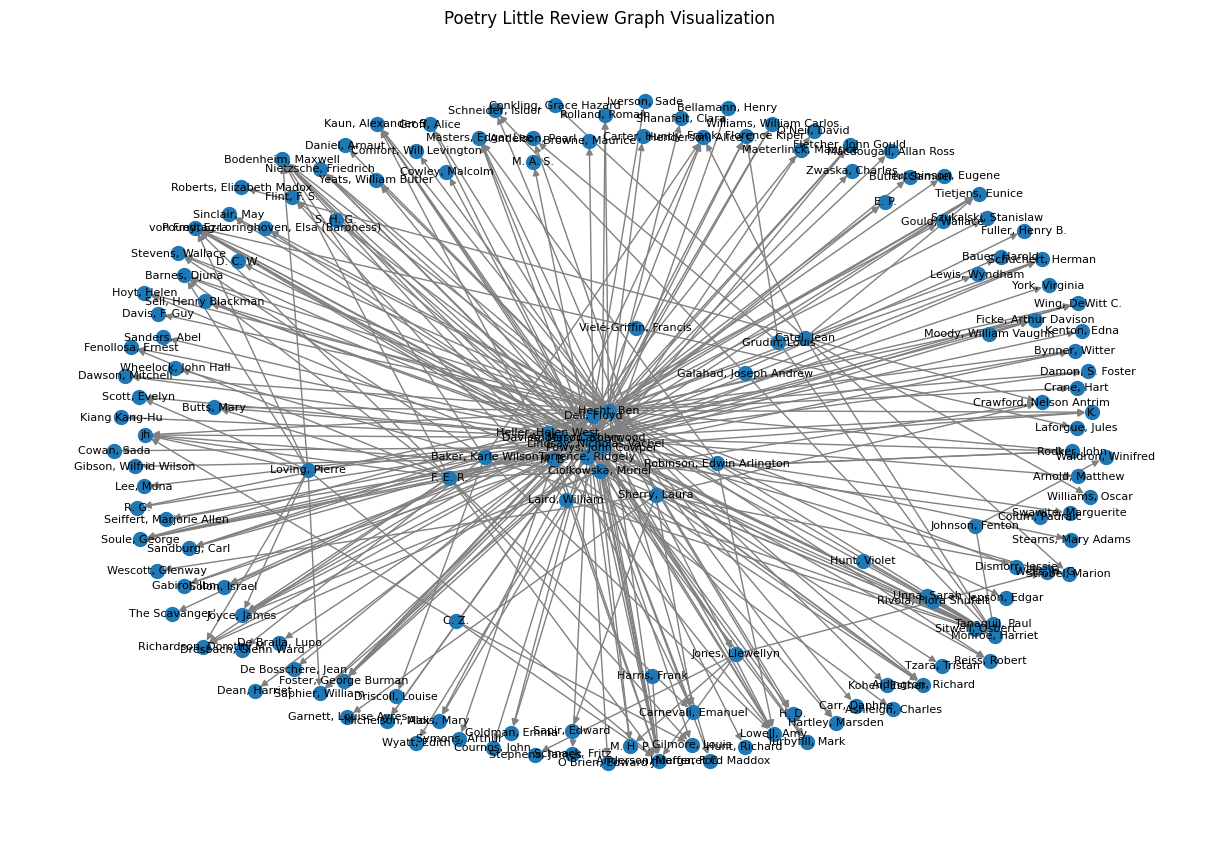

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("poetry-little-review-edges.csv")
df1=df.head(300)
# Create a directed graph from the DataFrame
G = nx.from_pandas_edgelist(df1, 'Source', 'Target', ['Weight'], create_using=nx.DiGraph)

# Visualize the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Seed for reproducibility
nx.draw(G, pos, with_labels=True, node_size=100, edge_color='gray', arrows=True, font_size=8)
plt.title("Poetry Little Review Graph Visualization")
plt.show()

In [ ]:
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(20,10))
nx.draw(G, pos, with_labels=True, node_color='red', node_size=50, edge_color='black', width=1,)

# Customize the graph appearance
plt.title("Poetry Little Review Graph Visualization")
plt.axis('On')

# Display the graph
plt.show()

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)
for node, centrality in betweenness_centrality.items():
    print(f"Node {node}: Betweenness centrality = {centrality}")

Node Moody, William Vaughn: Betweenness centrality = 0.0
Node Ficke, Arthur Davison: Betweenness centrality = 0.0
Node Baker, Karle Wilson: Betweenness centrality = 0.0
Node Stevens, Wallace: Betweenness centrality = 0.0
Node Henderson, Alice C.: Betweenness centrality = 0.0
Node Bodenheim, Maxwell: Betweenness centrality = 0.0
Node Monroe, Harriet: Betweenness centrality = 0.0
Node Dresbach, Glenn Ward: Betweenness centrality = 0.0
Node Wheelock, John Hall: Betweenness centrality = 0.0
Node Driscoll, Louise: Betweenness centrality = 0.0
Node Lowell, Amy: Betweenness centrality = 0.0
Node Sandburg, Carl: Betweenness centrality = 0.0
Node C. Z.: Betweenness centrality = 0.0
Node jh: Betweenness centrality = 0.0
Node Anderson, Margaret C.: Betweenness centrality = 0.0
Node Gilmore, Louis: Betweenness centrality = 0.0
Node Hunt, Violet: Betweenness centrality = 0.0
Node Harris, Frank: Betweenness centrality = 0.0
Node Torrence, Ridgely: Betweenness centrality = 0.0
Node Colum, Padraic: Be

In [ ]:
centrality_dict = {'Node': [], 'Betweenness centrality': []}
for node, centrality in betweenness_centrality.items():
    centrality_dict['Node'].append(node)
    centrality_dict['Betweenness centrality'].append(centrality)

# create a pandas DataFrame from the list of dictionaries
BC = pd.DataFrame.from_dict(centrality_dict)
BC

Node  Betweenness centrality
0     Moody, William Vaughn                     0.0
1     Ficke, Arthur Davison                     0.0
2       Baker, Karle Wilson                     0.0
3          Stevens, Wallace                     0.0
4       Henderson, Alice C.                     0.0
..                      ...                     ...
151         Browne, Maurice                     0.0
152        Bellamann, Henry                     0.0
153  Galahad, Joseph Andrew                     0.0
154          Tanaquil, Paul                     0.0
155         Stephens, James                     0.0

[156 rows x 2 columns]

In [ ]:
BC_df = BC.sort_values(by='Betweenness centrality',ascending=False).head(20)

In [ ]:
!pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.offline import plot
import pyvis as py
import plotly.express as px

import holoviews as hv
from holoviews import opts
from bokeh.tile_providers import STAMEN_TONER

In [ ]:
BCi = go.Figure(data=[go.Bar(x=BC_df['Node'], y=BC_df['Betweenness centrality'])])
BCi.update_layout(title='Betweenness centrality', xaxis_title='Character', yaxis_title='Influence')

In [ ]:
df_filter = BC_df.head(5)
name_list = df_filter["Node"].tolist()
df_bc = df[df["Source"].isin(name_list)]
df_filter.rename(columns={'Node': 'Source'}, inplace=True)
df_merged = pd.merge(df_bc, df_filter, on='Source', how='left')

<ipython-input-12-46a764759b56>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
G1 = nx.from_pandas_edgelist(df_merged, 'Source', 'Target', edge_attr=True)
betweenness_centrality = nx.betweenness_centrality(G1)

<ipython-input-14-6cb66b7c916e>:17: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



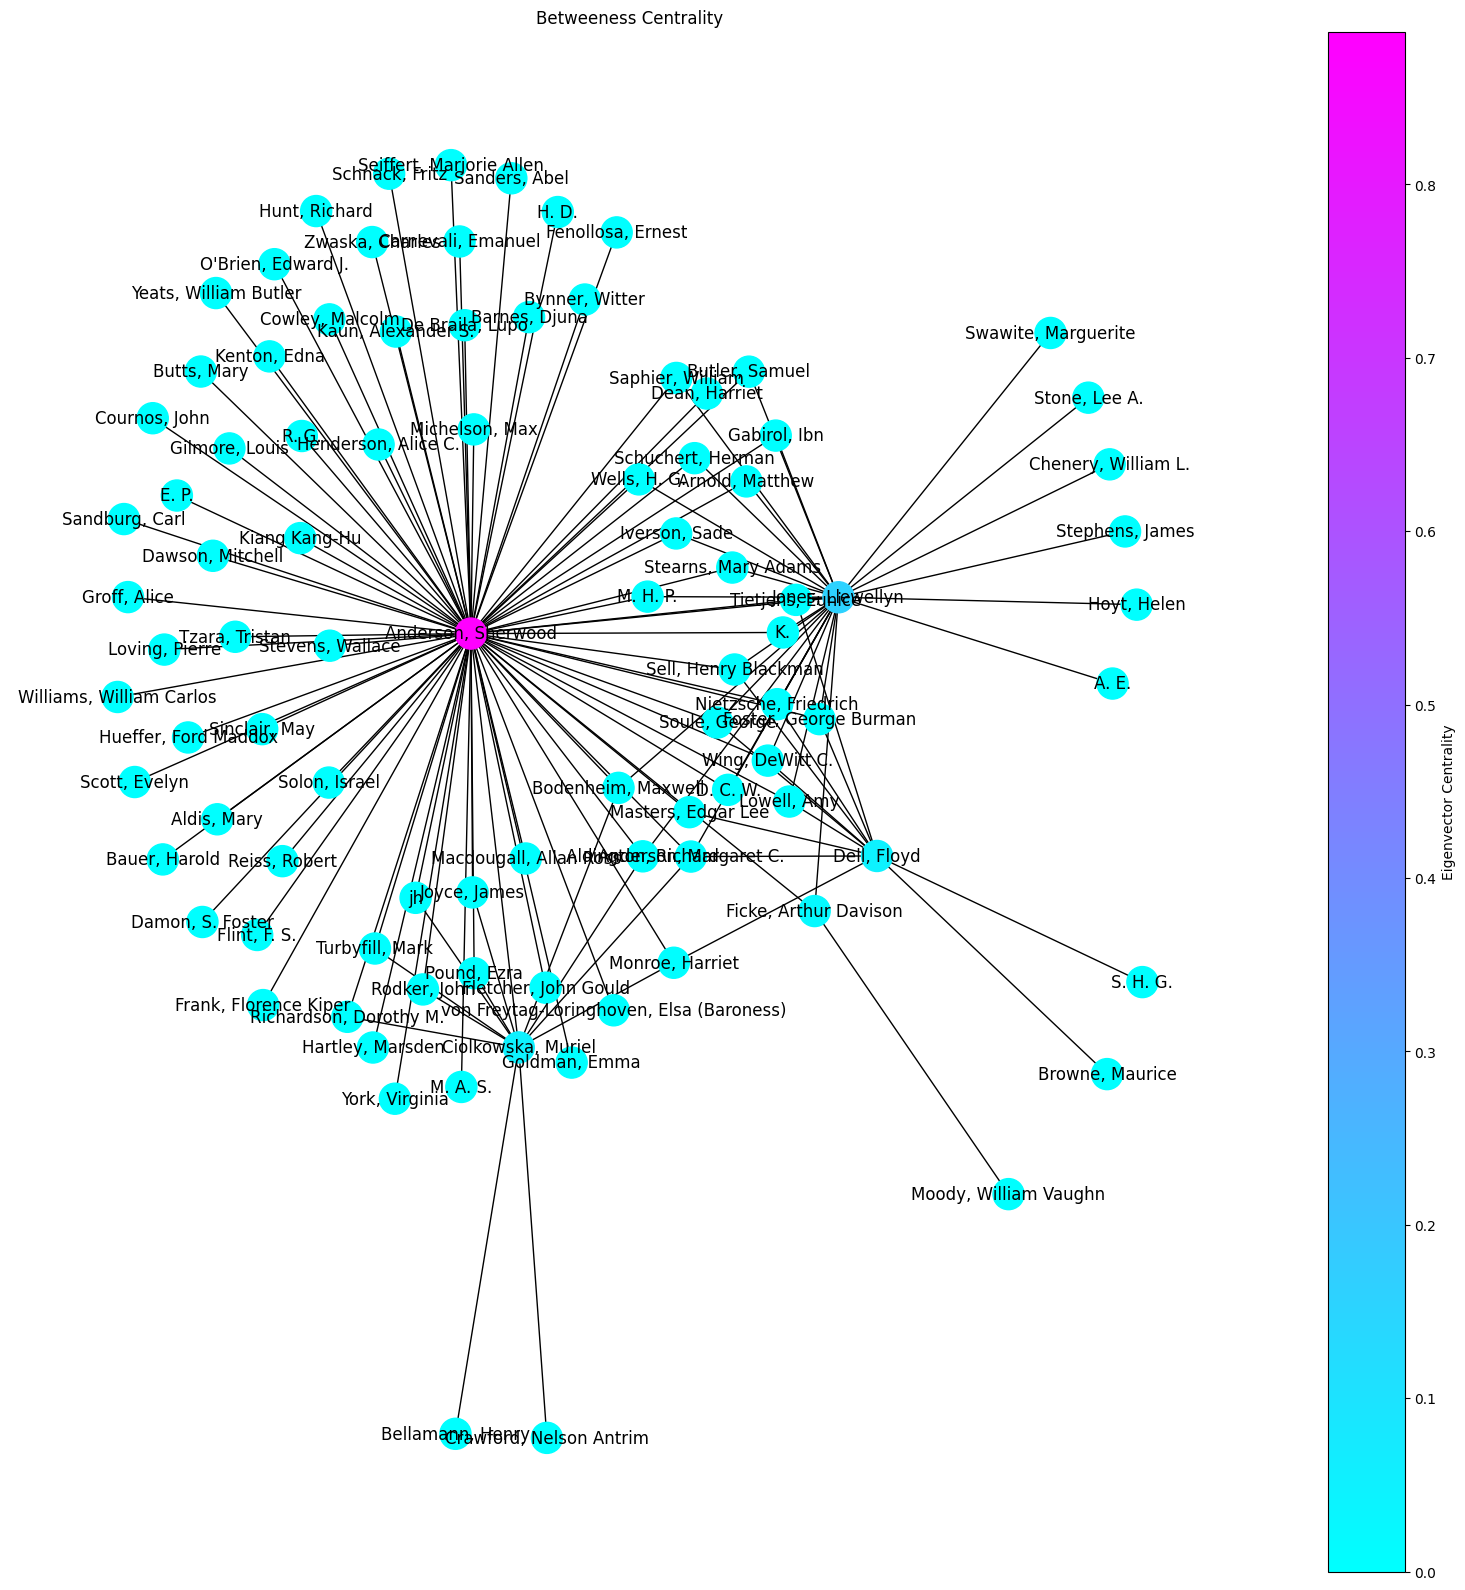

In [ ]:
pos = nx.spring_layout(G1)  # Layout algorithm for node positions
plt.figure(figsize=(20,20))
node_colors = list(betweenness_centrality.values())  # Use eigenvector centrality as node colors

# Draw the nodes
nx.draw_networkx_nodes(G1, pos, node_color=node_colors, cmap='cool', node_size=500)

# Draw the edges
nx.draw_networkx_edges(G1, pos)

# Add labels to the nodes
nx.draw_networkx_labels(G1, pos)

# Add a color bar for the node colors
sm = plt.cm.ScalarMappable(cmap='cool', norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])
plt.colorbar(sm, label='Eigenvector Centrality')

# Display the plot
plt.title("Betweeness Centrality")
plt.axis('off')
plt.show()

In [ ]:
closeness_centrality = nx.closeness_centrality(G)
for node, centrality in closeness_centrality.items():
    print(f"Node {node}: closeness centrality = {centrality}")

Node Moody, William Vaughn: closeness centrality = 0.0
Node Ficke, Arthur Davison: closeness centrality = 0.026881720430107527
Node Baker, Karle Wilson: closeness centrality = 0.0
Node Stevens, Wallace: closeness centrality = 0.02064516129032258
Node Henderson, Alice C.: closeness centrality = 0.02903225806451613
Node Bodenheim, Maxwell: closeness centrality = 0.05161290322580645
Node Monroe, Harriet: closeness centrality = 0.13576437587657786
Node Dresbach, Glenn Ward: closeness centrality = 0.0064516129032258064
Node Wheelock, John Hall: closeness centrality = 0.0064516129032258064
Node Driscoll, Louise: closeness centrality = 0.0064516129032258064
Node Lowell, Amy: closeness centrality = 0.045878136200716846
Node Sandburg, Carl: closeness centrality = 0.02064516129032258
Node C. Z.: closeness centrality = 0.0
Node jh: closeness centrality = 0.03870967741935484
Node Anderson, Margaret C.: closeness centrality = 0.08387096774193549
Node Gilmore, Louis: closeness centrality = 0.0206451

In [ ]:
clo_dict = {'Node': [], 'closeness_centrality': []}
for node, centrality in closeness_centrality.items():
    clo_dict['Node'].append(node)
    clo_dict['closeness_centrality'].append(centrality)

In [ ]:
close_df = pd.DataFrame.from_dict(clo_dict).sort_values(by='closeness_centrality',ascending=False)

In [ ]:
cdf = close_df.head(20)
clc = go.Figure(data=[go.Bar(x=cdf['Node'], y=cdf['closeness_centrality'])])
clc.update_layout(title='closeness_centrality', xaxis_title='Character', yaxis_title='Influence')

In [ ]:
df_filter = cdf.head(4)
name_list = df_filter["Node"].tolist()
df_cc = df[df["Source"].isin(name_list)]
df_filter.rename(columns={'Node': 'Source'}, inplace=True)
df_merged = pd.merge(df_cc, df_filter, on='Source', how='left')
G2 = nx.from_pandas_edgelist(df_merged, 'Source', 'Target', edge_attr=True)

<ipython-input-17-7f37f05990cd>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df1=df.head(100)

<ipython-input-19-3e8d0cc161c5>:10: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



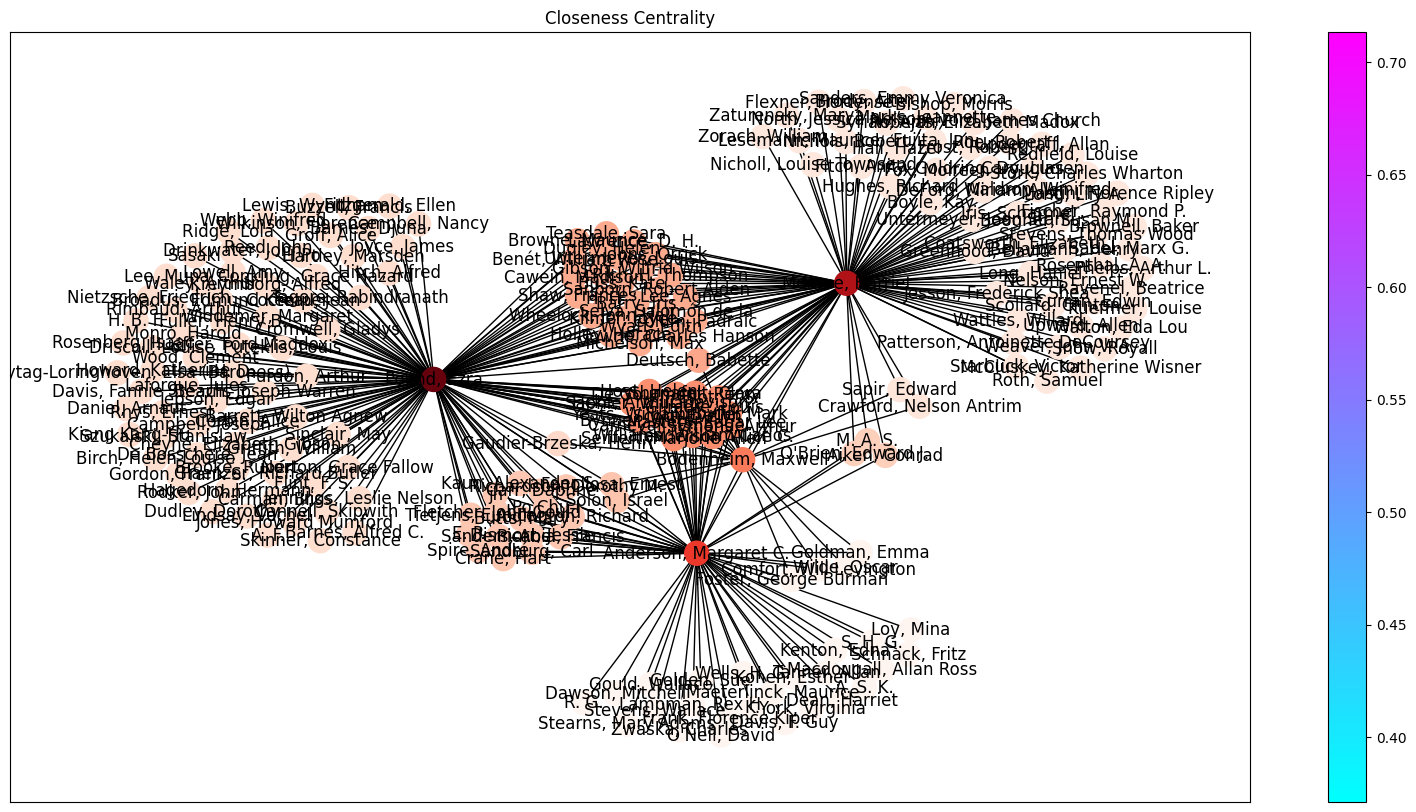

In [ ]:
closeness_centrality = nx.closeness_centrality(G2)

# Visualize the graph with node colors based on closeness centrality
node_colors = [closeness_centrality[node] for node in G2.nodes]
pos = nx.spring_layout(G2, seed=42)
plt.figure(figsize=(20,10))
nx.draw_networkx(G2, pos, node_color=node_colors, cmap=plt.cm.Reds, with_labels=True)
sm = plt.cm.ScalarMappable(cmap='cool')
sm.set_array(node_colors)
plt.colorbar(sm)
plt.title("Closeness Centrality")
plt.show()

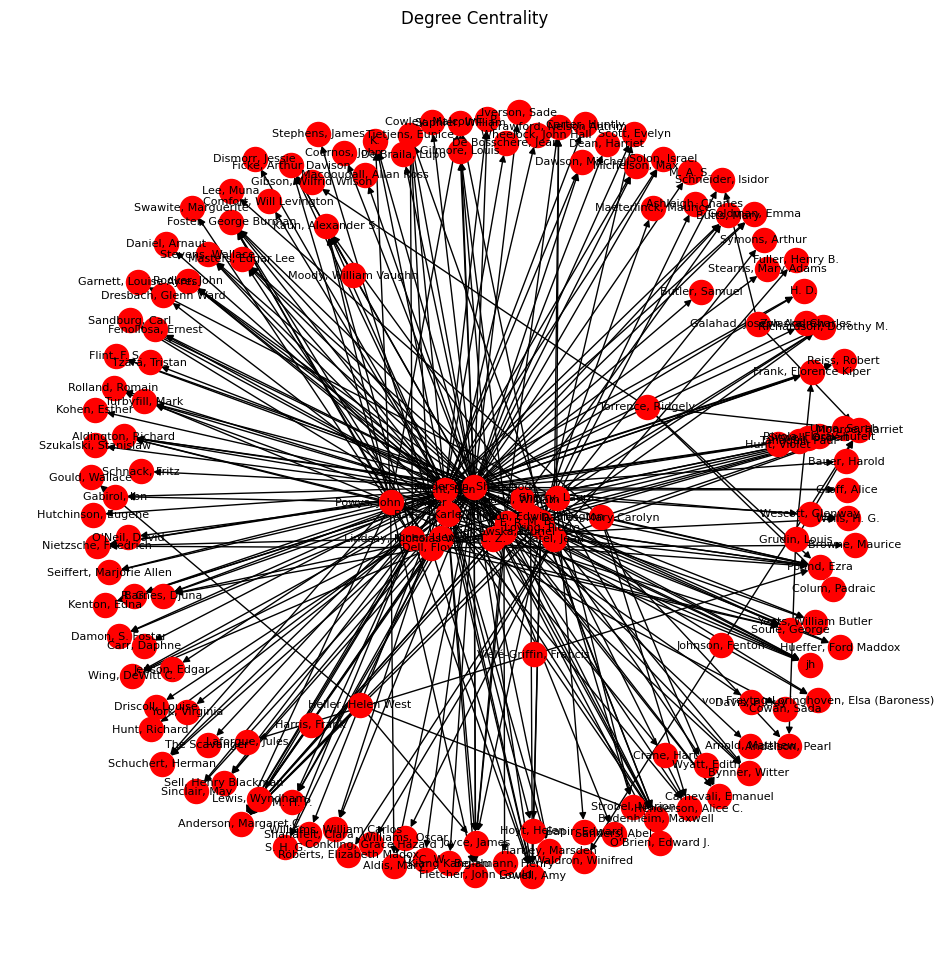

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Create a list of colors based on degree centrality values
node_colors = [degree_centrality[node] for node in G.nodes()]

# Create a layout for the graph
pos = nx.spring_layout(G)

# Define figure size
plt.figure(figsize=(12, 12))

# Draw the nodes with smaller size and red color
nx.draw_networkx_nodes(G, pos, node_color='red', node_size=300)

# Draw the edges
nx.draw_networkx_edges(G, pos)

# Draw the labels with smaller font size
nx.draw_networkx_labels(G, pos, font_size=8)

# Display the plot without color bar as we have only one color
plt.title("Degree Centrality")
plt.axis('off')
plt.show()


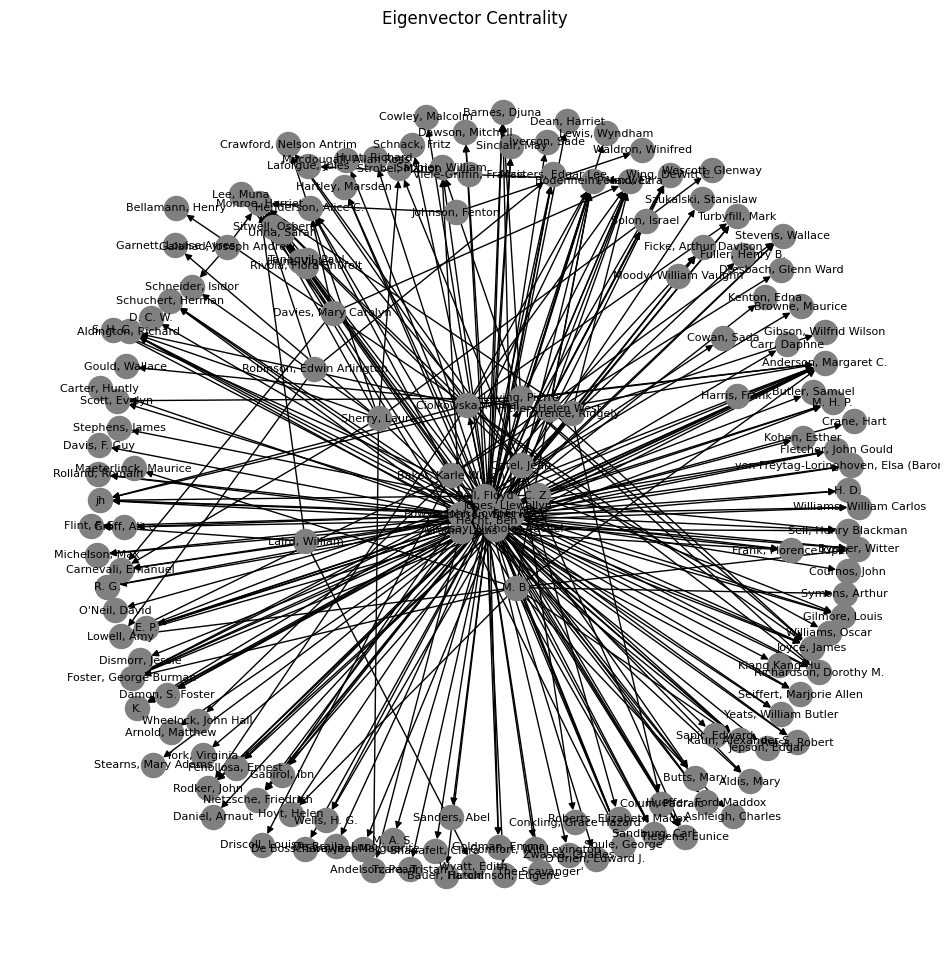

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Calculate eigenvector centrality with adjusted parameters
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-6)

# Create a list of colors based on eigenvector centrality values
node_colors = [eigenvector_centrality[node] for node in G.nodes()]

# Create a layout for the graph
pos = nx.spring_layout(G)

# Define figure size
plt.figure(figsize=(12, 12))

# Draw the nodes with smaller size and red color
nx.draw_networkx_nodes(G, pos, node_color='grey', node_size=300)

# Draw the edges
nx.draw_networkx_edges(G, pos)

# Draw the labels with smaller font size
nx.draw_networkx_labels(G, pos, font_size=8)

# Display the plot without color bar as we have only one color
plt.title("Eigenvector Centrality")
plt.axis('off')
plt.show()


In [ ]:
import networkx as nx

# Assuming G is your directed graph
undirected_G = G.to_undirected()

# Find cliques in the undirected graph
cliques = list(nx.find_cliques(undirected_G))

# Print the cliques
for i, clique in enumerate(cliques, start=1):
    print(f"Clique {i}: {clique}")



Clique 1: ['Torrence, Ridgely', 'Pound, Ezra']
Clique 2: ['Torrence, Ridgely', 'Gibson, Wilfrid Wilson']
Clique 3: ['Torrence, Ridgely', 'Colum, Padraic']
Clique 4: ['Torrence, Ridgely', 'Monroe, Harriet']
Clique 5: ['Swawite, Marguerite', 'Lindsay, Nicholas Vachel']
Clique 6: ['Catel, Jean', 'Roberts, Elizabeth Madox']
Clique 7: ['Catel, Jean', 'Tietjens, Eunice']
Clique 8: ['Catel, Jean', 'Fuller, Henry B.']
Clique 9: ['Catel, Jean', 'Henderson, Alice C.']
Clique 10: ['Catel, Jean', 'Conkling, Grace Hazard']
Clique 11: ['Catel, Jean', 'Monroe, Harriet']
Clique 12: ['Catel, Jean', 'Williams, Oscar']
Clique 13: ['Catel, Jean', 'Crawford, Nelson Antrim']
Clique 14: ['Catel, Jean', 'Strobel, Marion']
Clique 15: ['Symons, Arthur', 'M. B.']
Clique 16: ['Lindsay, Nicholas Vachel', 'Pound, Ezra']
Clique 17: ['Lindsay, Nicholas Vachel', 'Jones, Llewellyn', 'Anderson, Margaret C.']
Clique 18: ['Lindsay, Nicholas Vachel', 'Jones, Llewellyn', 'M. H. P.']
Clique 19: ['Lindsay, Nicholas Vachel', '

In [ ]:
print("no of cliques : ",len(cliques))

no of cliques :  235


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load data


# Convert string node labels to numerical IDs
node_id_mapping = {node: i for i, node in enumerate(set(df['Source']) | set(df['Target']))}
df['Source_ID'] = df['Source'].map(node_id_mapping)
df['Target_ID'] = df['Target'].map(node_id_mapping)

# Split data into features (X) and target variable (y)
X = df[['Source_ID', 'Target_ID']]
y = df['Weight']  # Assuming 'Label' column indicates whether the link exists (0 for absence, 1 for presence)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier for link prediction
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.45517241379310347


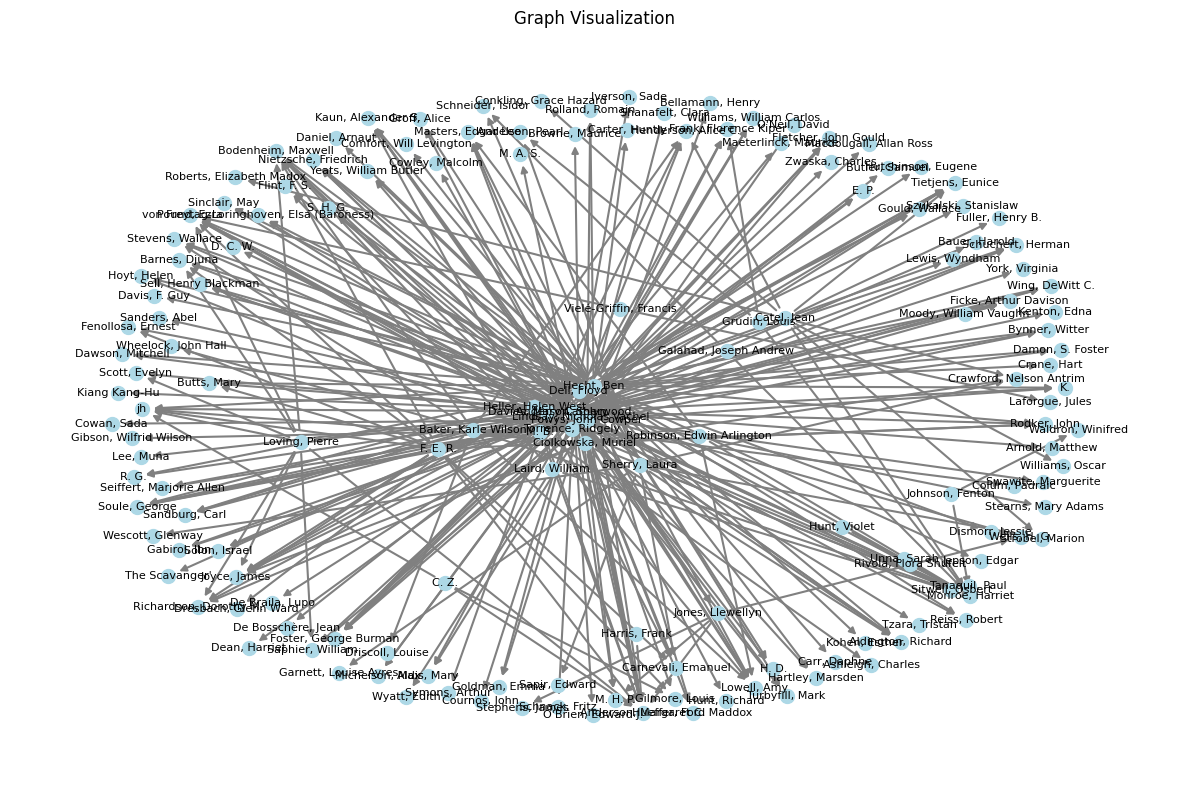

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "poetry-little-review-edges.csv"
df = pd.read_csv(file_path)
df1 = df.head(300)

# Create a directed graph from the DataFrame
G = nx.from_pandas_edgelist(df1, 'Source', 'Target', ['Weight'], create_using=nx.DiGraph)

# Set node and edge colors
node_color = 'lightblue'
edge_color = 'gray'

# Set node size and edge width
node_size = 100
edge_width = 1.5

# Set font size for node labels
font_size = 8

# Set layout style
layout_style = 'spring'

# Visualize the graph
plt.figure(figsize=(12, 8))

# Compute layout based on chosen style
if layout_style == 'spring':
    pos = nx.spring_layout(G, seed=42)
elif layout_style == 'kamada_kawai':
    pos = nx.kamada_kawai_layout(G)
else:
    pos = nx.circular_layout(G)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=node_size)
nx.draw_networkx_edges(G, pos, edge_color=edge_color, width=edge_width, arrows=True)

# Draw labels with custom font size
nx.draw_networkx_labels(G, pos, font_size=font_size)

# Display the plot
plt.title("Graph Visualization")
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
!pip install python-louvain

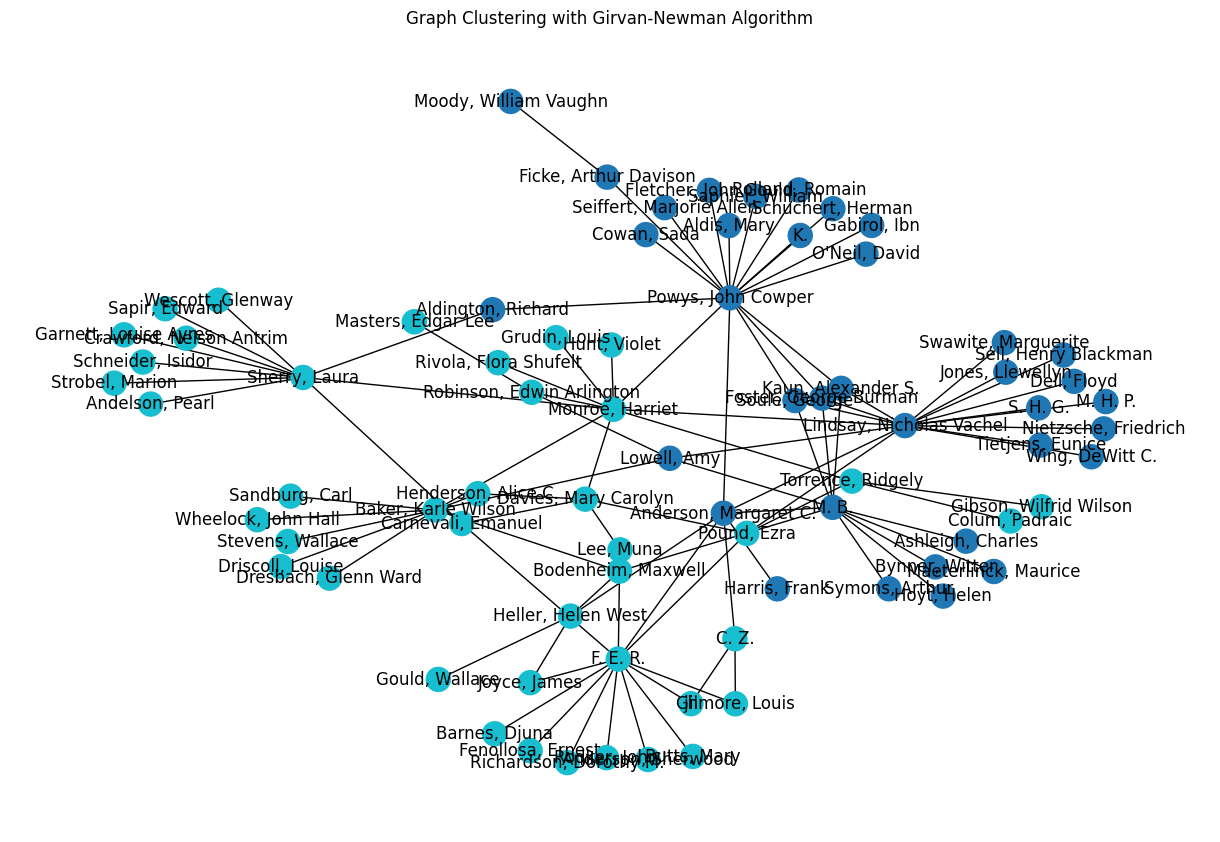

In [ ]:

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community  # Install with: pip install python-louvain

# Load data
file_path = "poetry-little-review-edges.csv"
df = pd.read_csv(file_path)

df1=df.head(100)

# Create a graph from the DataFrame
G = nx.from_pandas_edgelist(df1, 'Source', 'Target', edge_attr='Weight', create_using=nx.Graph())

# Apply Girvan-Newman algorithm for graph clustering
communities_generator = nx.community.girvan_newman(G)
top_level_communities = next(communities_generator)
partition = {node: i for i, nodes in enumerate(top_level_communities) for node in nodes}

# Visualize the graph with cluster colors
pos = nx.spring_layout(G)  # Define layout
plt.figure(figsize=(12, 8))
nx.draw(G, pos, node_color=[partition[node] for node in G.nodes()], with_labels=True, cmap=plt.cm.tab10)
plt.title('Graph Clustering with Girvan-Newman Algorithm')
plt.show()



In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
!pip install torch-scatter


  Using cached torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl


In [ ]:
!pip install torch-sparse

In [ ]:
!pip install torch-clusterm

  Using cached torch_cluster-1.6.3.tar.gz (54 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for torch-cluster: filename=torch_cluster-1.6.3-cp310-cp310-linux_x86_64.whl size=714413 sha256=0c738ac1ba0f3f00c539135745c0de19836a9762a85235b3d6aa481b132a5141
  Stored in directory: /root/.cache/pip/wheels/51/78/c3/536637b3cdcc3313aa5e8851a6c72b97f6a01877e68c7595e3
Successfully built torch-cluster


In [ ]:
!pip install torch-spline-conv

  Using cached torch_spline_conv-1.2.2.tar.gz (25 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for torch-spline-conv: filename=torch_spline_conv-1.2.2-cp310-cp310-linux_x86_64.whl size=205737 sha256=1bd469aa5cfc4dc1f9040af7146f03da20274ac9d7d1c79cf0a9d606bedafaf9
  Stored in directory: /root/.cache/pip/wheels/fc/34/be/187e4b5f5ccefecca2c1a5dfc8da244ec50baa1f33c7b8c9a1
Successfully built torch-spline-conv


In [ ]:
!pip install torch-geometric

  Using cached torch_geometric-2.5.3-py3-none-any.whl (1.1 MB)


<ipython-input-82-d1b09af9d484>:53: UserWarning:

Using a target size (torch.Size([300])) that is different to the input size (torch.Size([156, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



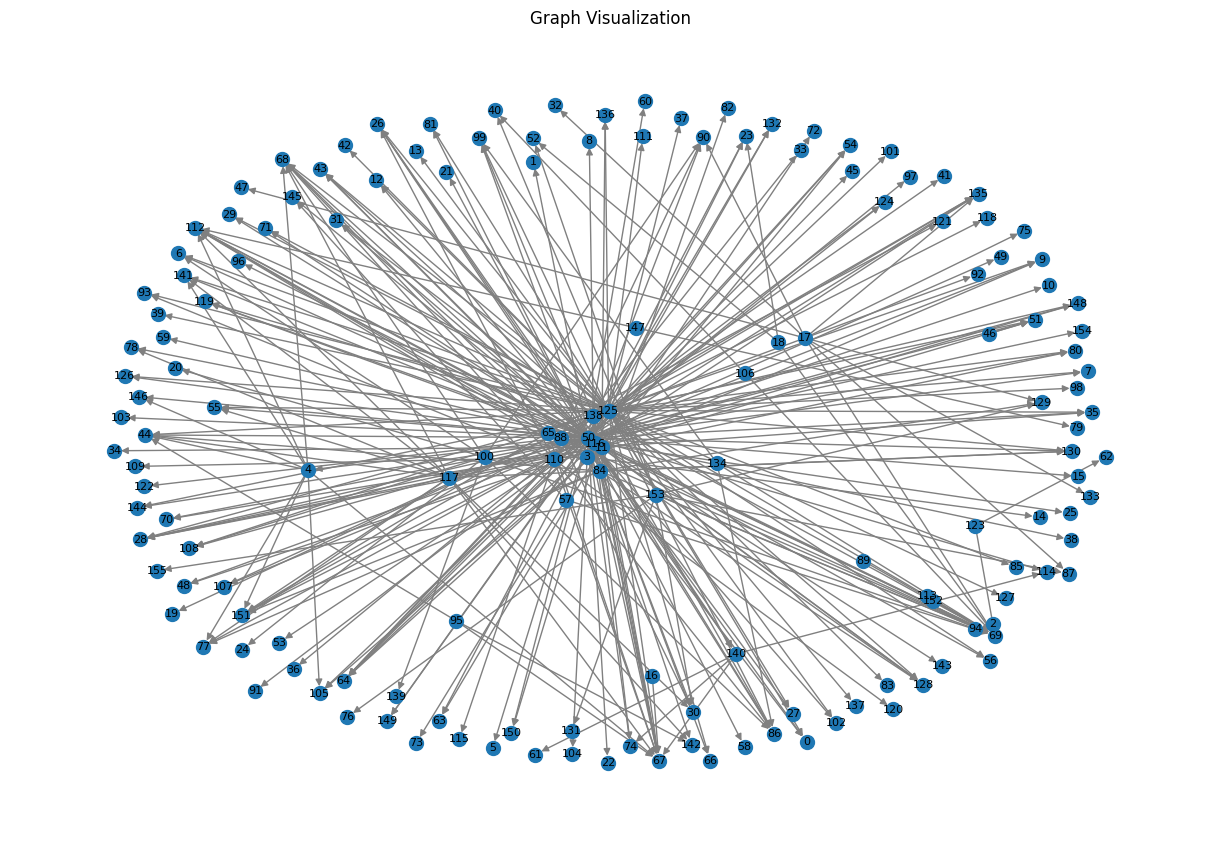

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

file_path = "poetry-little-review-edges.csv"
df = pd.read_csv(file_path)

df=df.head(300)


# Convert strings to unique numeric identifiers
node_dict = {node: idx for idx, node in enumerate(set(df['Source']).union(df['Target']))}
df['Source'] = df['Source'].map(node_dict)
df['Target'] = df['Target'].map(node_dict)

# Create a PyG Data object
edge_index = torch.tensor(df[['Source', 'Target']].values.T, dtype=torch.long)
edge_attr = torch.tensor(df['Weight'].values, dtype=torch.float)
num_nodes = len(node_dict)
data = Data(edge_index=edge_index, edge_attr=edge_attr, num_nodes=num_nodes)

# Initialize input features with identity features
x = torch.eye(num_nodes)  # Identity features

# Define a simple GNN model
class SimpleGNN(nn.Module):
    def __init__(self):
        super(SimpleGNN, self).__init__()
        self.conv1 = GCNConv(data.num_features, 16)
        self.conv2 = GCNConv(16, 1)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# Instantiate the model
model = SimpleGNN()

# Train the model (dummy example)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
model.train()
for epoch in range(100):
    optimizer.zero_grad()
    out = model(x, data.edge_index)  # Pass input features 'x' instead of 'data.x'
    loss = F.mse_loss(out, data.edge_attr)  # Compute MSE loss directly
    loss.backward()
    optimizer.step()

# Plot the result
G = nx.from_pandas_edgelist(df, 'Source', 'Target', ['Weight'], create_using=nx.DiGraph)
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=100, edge_color='gray', arrows=True, font_size=8)
plt.title("Graph Visualization")
plt.show()


In [ ]:
print(data)

Data(edge_index=[2, 2426], Weight=[2426], num_nodes=391, edge_attr=[2426])


In [ ]:
!pip install VADER lexicon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sonopy: filename=sonopy-0.1.2-py3-none-any.whl size=2854 sha256=5cae7606ecc17c2e0e507db9195c7f69465b3ab9c4cb8202cb1f619ee9558dc7
  Stored in directory: /root/.cache/pip/wheels/66/36/01/0befaea511dbcd81ed17411b310c4633539e15f34275805000
Successfully built sonopy


In [ ]:
import pandas as pd
import networkx as nx
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load your poetry dataset
poetry_df = pd.read_csv('poetry-little-review-edges.csv')  # Replace 'your_poetry_dataset.csv' with your actual file name

# Create a graph from the dataset
G = nx.from_pandas_edgelist(poetry_df, 'Source', 'Target', edge_attr='Weight')

# Example of computing centrality measures
degree_centrality = nx.degree_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Create a DataFrame with node features
node_features = pd.DataFrame({
    'Node': list(G.nodes()),
    'Degree_Centrality': [degree_centrality[node] for node in G.nodes()],
    'Eigenvector_Centrality': [eigenvector_centrality[node] for node in G.nodes()]
})

# Merge node features with edge weights
edges = poetry_df[['Source', 'Target', 'Weight']]
edges = edges.merge(node_features, left_on='Source', right_on='Node', how='left')
edges = edges.merge(node_features, left_on='Target', right_on='Node', suffixes=('_source', '_target'), how='left')
edges.drop(columns=['Node_source', 'Node_target'], inplace=True)

# Split data into features (X) and target (y)
X = edges[['Degree_Centrality_source', 'Eigenvector_Centrality_source', 'Degree_Centrality_target', 'Eigenvector_Centrality_target']]
y = edges['Weight']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree regressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 6.1558730858598585


In this code:

We load the poetry dataset into a NetworkX graph and compute centrality measures for the nodes.
We merge the node features with edge weights to form the dataset for the decision tree regressor.
We split the dataset into training and testing sets.
We initialize and train a decision tree regressor model.
We make predictions on the test set and evaluate the model's performance using mean squared error.

In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load your poetry dataset
poetry_df = pd.read_csv("/poetry-little-review-edges.csv")  # Replace 'your_poetry_dataset.csv' with your actual file name

# Assuming 'Source', 'Target', and 'Weight' are columns in your dataset
# Extract features and target variable
X = poetry_df[['Source', 'Target']]  # Assuming you have features
y = poetry_df['Weight']  # Target variable

# Split the data into training and testing sets
# Convert categorical variables into numerical format using one-hot encoding
X_encoded = pd.get_dummies(X, columns=['Source', 'Target'], drop_first=True)

# Split the encoded data into training and testing sets
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_encoded, y_train)

# Make predictions using the linear regression model
y_pred_linear = linear_model.predict(X_test_encoded)

# Evaluate the linear regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression Mean Squared Error:", mse_linear)

# Initialize and train a baseline model (e.g., Random Forest Regressor)
baseline_model = RandomForestRegressor(n_estimators=100, random_state=42)
baseline_model.fit(X_train_encoded, y_train)

# Make predictions using the baseline model
y_pred_baseline = baseline_model.predict(X_test_encoded)

# Evaluate the baseline model
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
print("Baseline Model (Random Forest) Mean Squared Error:", mse_baseline)

# Compare the performance of the models
if mse_linear < mse_baseline:
    print("Linear Regression model performs better.")
elif mse_linear > mse_baseline:
    print("Baseline Model (Random Forest) performs better.")
else:
    print("Both models perform equally.")


Linear Regression Mean Squared Error: 7.82570115110538e+26
Baseline Model (Random Forest) Mean Squared Error: 9.991057613168726
Baseline Model (Random Forest) performs better.


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assuming you have already defined and created your graph 'G'

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Sort the nodes based on degree centrality values in descending order
sorted_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 nodes
top_10_nodes = sorted_nodes[:10]

# Print the top 10 nodes and their degree centrality values
for node, centrality in top_10_nodes:
    print(f"Node: {node}, Degree Centrality: {centrality}")

# If you want just the node names in a list
top_10_node_names = [node for node, _ in top_10_nodes]
print("Top 10 Nodes:", top_10_node_names)


Node: Anderson, Sherwood, Degree Centrality: 0.535483870967742
Node: Hecht, Ben, Degree Centrality: 0.38064516129032255
Node: Monroe, Harriet, Degree Centrality: 0.13548387096774195
Node: Powys, John Cowper, Degree Centrality: 0.10967741935483871
Node: Lindsay, Nicholas Vachel, Degree Centrality: 0.1032258064516129
Node: Anderson, Margaret C., Degree Centrality: 0.08387096774193549
Node: Dell, Floyd, Degree Centrality: 0.08387096774193549
Node: F. E. R., Degree Centrality: 0.08387096774193549
Node: Ciolkowska, Muriel, Degree Centrality: 0.08387096774193549
Node: M. B., Degree Centrality: 0.07096774193548387
Top 10 Nodes: ['Anderson, Sherwood', 'Hecht, Ben', 'Monroe, Harriet', 'Powys, John Cowper', 'Lindsay, Nicholas Vachel', 'Anderson, Margaret C.', 'Dell, Floyd', 'F. E. R.', 'Ciolkowska, Muriel', 'M. B.']
